In [8]:
pip install gym

In [9]:
import numpy as np
import gym
from collections import defaultdict

In [10]:
env = gym.make('CliffWalking-v0')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [5]:
alpha = 0.1
gamma = 0.99
epsilon = 0.1
num_episodes = 500;

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
q_table = defaultdict(lambda: np.zeros(env.action_space.n))

In [7]:
def choose_action(state):
    """Epsilon-greedy policy."""
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

In [11]:
for episode in range(num_episodes):
    state = env.reset()  # Reset the environment
    done = False
    total_reward = 0

    while not done:
        # Choose an action
        action = choose_action(state)

        # Perform the action and observe the next state and reward
        next_state, reward, done, _ = env.step(action)

        # Q-Learning update rule
        best_next_action = np.argmax(q_table[next_state])
        q_table[state][action] += alpha * (reward + gamma * q_table[next_state][best_next_action] - q_table[state][action])

        # Update state and total reward
        state = next_state
        total_reward += reward

    # Print episode stats
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}")


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 100, Total Reward: -28
Episode: 200, Total Reward: -129
Episode: 300, Total Reward: -13
Episode: 400, Total Reward: -13
Episode: 500, Total Reward: -17


In [12]:
state = env.reset()
done = False
while not done:
    action = np.argmax(q_table[state])
    next_state, _, done, _ = env.step(action)
    state = next_state
    env.render()

env.close()

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_reso

In [15]:
pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [16]:
def default_q_values():
    return np.zeros(env.action_space.n)

In [17]:
q_table = defaultdict(default_q_values)

In [18]:
import pickle
with open("q_table.pkl", "wb") as f:
    pickle.dump(dict(q_table), f)  # Convert defaultdict to a regular dictionary before saving

In [19]:
with open("q_table.pkl", "rb") as f:
    loaded_q_table = pickle.load(f)
q_table = defaultdict(default_q_values, loaded_q_table)


In [20]:
import pickle
with open("q_table.pkl", "wb") as f:
    pickle.dump(q_table, f)

In [21]:
from google.colab import files
files.download("q_table.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
with open("q_table.pkl", "rb") as f:
    q_table = pickle.load(f)


In [23]:
print(f"State: {state}, Action: {action}, Reward: {reward}")


State: 47, Action: 2, Reward: -1


<ipython-input-24-4c4ed4cf3c9a>:36: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=rect_color, edgecolor='black'))


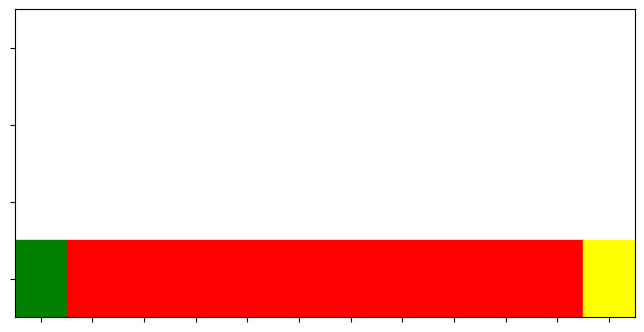

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def render_grid(state, path=[]):
    """
    Visualize the Cliff Walking environment.
    """
    grid_size = (4, 12)  # 4 rows x 12 columns
    grid = np.zeros(grid_size)

    # Mark the cliff region
    grid[3, 1:11] = -100  # Cliff

    # Mark start and goal
    start = (3, 0)
    goal = (3, 11)
    grid[start] = 1  # Start
    grid[goal] = 100  # Goal

    # Plot the grid
    fig, ax = plt.subplots(figsize=(8, 4))
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if (i, j) in path:
                # Highlight agent's path
                ax.text(j, i, 'A', ha='center', va='center', color='white', fontsize=12)
                rect_color = 'blue'
            elif grid[i, j] == -100:
                rect_color = 'red'
            elif grid[i, j] == 1:
                rect_color = 'green'
            elif grid[i, j] == 100:
                rect_color = 'yellow'
            else:
                rect_color = 'white'
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=rect_color, edgecolor='black'))

    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    ax.set_xticks(np.arange(grid_size[1]) + 0.5)
    ax.set_yticks(np.arange(grid_size[0]) + 0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    plt.gca().invert_yaxis()
    plt.show()

# Example of visualizing the grid with the agent's position
render_grid((3, 0))  # Initial state
